## property price prediction project

In [130]:
import os
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset/ProjectonPropertyPricePrediction/Dataset")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
df=pd.read_csv("HousePrices.csv")

In [2]:
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [3]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.describe(include='object')

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,...,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1611,2063,72,1300,1854,2070,1481,1958,317,1794,...,1252,857,1870,1885,1913,4,233,74,1797,1695


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [6]:
df.isna().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [7]:
df.isna().sum()/(len(df))*100

Id                      0.000000
Dwell_Type              0.000000
Zone_Class              0.000000
LotFrontage            15.436565
LotArea                 0.000000
                         ...    
MoSold                  0.000000
YrSold                  0.000000
SaleType                0.000000
SaleCondition           0.000000
Property_Sale_Price     0.000000
Length: 81, dtype: float64

In [8]:
df['Property_Sale_Price'].isna().sum()

0

In [9]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
df['Alley'].isna().sum()/(len(df))*100

93.77713458755427

In [11]:
df['Alley'].dtype

dtype('O')

In [12]:
#Replacing null value of categorical variable 'Alley' by 'None'
df['Alley'].replace(np.nan,'None',inplace=True)
df['Alley'].isna().sum()

0

In [13]:
df['LotFrontage'].isna().sum()/(len(df))*100

15.436565364206464

In [14]:
avg=df['LotFrontage'].astype('float').mean(axis=0)
avg

72.05647461494581

In [15]:
#Replacing null value of Numeric variable by average
df['LotFrontage'].replace(np.nan,avg,inplace=True)
df['LotFrontage'].isna().sum()

0

In [16]:
df['MasVnrType'].isna().sum()/(len(df))*100

0.6753497346840328

In [17]:
df['MasVnrType'].value_counts()

None       1233
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

In [18]:
#Replacing null value of categorical variable by None
df['MasVnrType'].replace(np.nan,'None',inplace=True)
df['MasVnrType'].isna().sum()

0

In [19]:
df['MasVnrArea'].isna().sum()/(len(df))*100

0.6753497346840328

In [20]:
med=df['MasVnrArea'].astype('float').median(axis=0)
med

0.0

<AxesSubplot:>

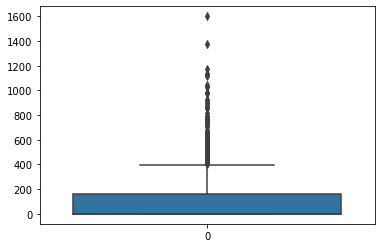

In [21]:
sns.boxplot(data=df['MasVnrArea'])

In [22]:
df['MasVnrArea'].replace(np.nan,med,inplace=True)
df['MasVnrArea'].isna().sum()

0

In [23]:
df['BsmtQual'].isna().sum()/(len(df))*100

2.846116739025567

In [24]:
df['BsmtQual'].dtype

dtype('O')

In [25]:
df['BsmtQual'].value_counts()

Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64

In [26]:
df['BsmtQual'].replace(np.nan,'Gd',inplace=True)
df['BsmtQual'].isna().sum()

0

In [27]:
df['BsmtCond'].isna().sum()/(len(df))*100

2.846116739025567

In [28]:
df['BsmtCond'].dtype

dtype('O')

In [29]:
df['BsmtCond'].value_counts()

TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64

In [30]:
df['BsmtCond'].replace(np.nan,'TA',inplace=True)
df['BsmtCond'].isna().sum()

0

In [31]:
df['BsmtExposure'].isna().sum()/(len(df))*100

2.942595272551857

In [32]:
df['BsmtExposure'].dtype

dtype('O')

In [33]:
df['BsmtExposure'].value_counts()

No    1349
Av     322
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64

In [34]:
df['BsmtExposure'].replace(np.nan,'No',inplace=True)
df['BsmtExposure'].isna().sum()

0

In [35]:
df['BsmtFinType1'].isna().sum()/(len(df))*100

df['BsmtFinType1'].dtype

df['BsmtFinType1'].value_counts()

df['BsmtFinType1'].replace(np.nan,'Unf',inplace=True)
df['BsmtFinType1'].isna().sum()

0

In [36]:
df['BsmtFinType1'].isna().sum()/(len(df))*100

df['BsmtFinType1'].dtype

df['BsmtFinType1'].value_counts()

df['BsmtFinType1'].replace(np.nan,'Unf',inplace=True)
df['BsmtFinType1'].isna().sum()

0

In [37]:
df['BsmtFinType2'].isna().sum()/(len(df))*100


2.894356005788712

In [38]:
df['BsmtFinType2'].dtype

dtype('O')

In [39]:
df['BsmtFinType2'].value_counts()

Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64

In [40]:
df['BsmtFinType1'].replace('Rec','Unf',inplace=True)
df['BsmtFinType1'].isna().sum()

0

In [41]:
df['BsmtFinType2'].replace('Unf','Rec',inplace=True)
df['BsmtFinType2'].isna().sum()

60

In [42]:
df['BsmtFinType2'].value_counts()

Rec    1849
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64

In [43]:
df['Electrical'].isna().sum()/(len(df))*100

0.0482392667631452

In [44]:
df['Electrical'].dtype

dtype('O')

In [45]:
df['Electrical'].value_counts()

SBrkr    1901
FuseA     127
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [46]:
df['Electrical'].replace(np.nan,'SBrkr',inplace=True)
df['Electrical'].isna().sum()

0

In [47]:
df['FireplaceQu'].isna().sum()/(len(df))*100

47.66039556198746

In [48]:
df['FireplaceQu'].dtype

dtype('O')

In [49]:
df['FireplaceQu'].value_counts()

Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: FireplaceQu, dtype: int64

In [50]:
df['FireplaceQu'].replace(np.nan,'Gd',inplace=True)
df['FireplaceQu'].isna().sum()

0

In [51]:
df['GarageType'].isna().sum()/(len(df))*100

5.451037144235408

In [52]:
df['GarageType'].dtype

dtype('O')

In [53]:
df['GarageType'].value_counts()

Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64

In [54]:
df['GarageType'].replace(np.nan,'Attchd',inplace=True)
df['GarageType'].isna().sum()

0

In [55]:
df['GarageYrBlt'].isna().sum()/(len(df))*100

5.451037144235408

In [56]:
df['GarageYrBlt'].dtype

dtype('float64')

In [57]:
df['GarageYrBlt'].describe()

count    1960.000000
mean     1980.418367
std        24.158327
min      1906.000000
25%      1963.000000
50%      1984.000000
75%      2003.000000
max      2019.000000
Name: GarageYrBlt, dtype: float64

In [58]:
avg=df['GarageYrBlt'].astype('float').mean(axis=0)
avg

1980.4183673469388

In [59]:
df['GarageYrBlt'].replace(np.nan,avg,inplace=True)
df['GarageYrBlt'].isna().sum()

0

In [60]:
df['GarageFinish'].isna().sum()/(len(df))*100

5.451037144235408

In [61]:
df['GarageFinish'].dtype

dtype('O')

In [62]:
df['GarageFinish'].value_counts()

Unf    857
RFn    605
Fin    498
Name: GarageFinish, dtype: int64

In [63]:
df['GarageFinish'].replace(np.nan,'Unf',inplace=True)
df['GarageFinish'].isna().sum()

0

In [64]:
df['GarageYrBlt'].replace('Unf',1980.4183673469388,inplace=True)
df['GarageYrBlt'].isna().sum()

0

In [65]:
df['GarageQual'].isna().sum()/(len(df))*100

5.451037144235408

In [66]:
df['GarageQual'].dtype

dtype('O')

In [67]:
df['GarageQual'].value_counts()

TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64

In [68]:
df['GarageQual'].replace(np.nan,'TA',inplace=True)
df['GarageQual'].isna().sum()

0

In [69]:
df['GarageCond'].isna().sum()/(len(df))*100

5.451037144235408

In [70]:
df['GarageCond'].dtype

dtype('O')

In [71]:
df['GarageCond'].value_counts()

TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: GarageCond, dtype: int64

In [72]:
df['GarageCond'].replace(np.nan,'TA',inplace=True)
df['GarageCond'].isna().sum()

0

In [73]:
df['PoolQC'].isna().sum()/(len(df))*100

99.61408586589484

In [74]:
df['PoolQC'].dtype

dtype('O')

In [75]:
df['PoolQC'].value_counts()

Gd    4
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [76]:
df['PoolQC'].replace('Gd','None',inplace=True)
df['PoolQC'].isna().sum()

2065

In [77]:
df['PoolQC'].value_counts()

None    4
Ex      2
Fa      2
Name: PoolQC, dtype: int64

In [78]:
df['Fence'].isna().sum()/(len(df))*100

80.51133622768933

In [79]:
df['Fence'].dtype

dtype('O')

In [80]:
df['Fence'].replace(np.nan,'None',inplace=True)
df['Fence'].isna().sum()

0

In [81]:
df['MiscFeature'].isna().sum()/(len(df))*100

96.14085865894837

In [82]:
df['MiscFeature'].dtype

dtype('O')

In [83]:
df['MiscFeature'].value_counts()

Shed    74
Othr     3
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [84]:
df['MiscFeature'].replace(np.nan,'None',inplace=True)
df['MiscFeature'].isna().sum()

0

In [85]:
df.isna().sum()

Id                     0
Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
                      ..
MoSold                 0
YrSold                 0
SaleType               0
SaleCondition          0
Property_Sale_Price    0
Length: 81, dtype: int64

In [86]:
df.columns[df.isnull().any()]

Index(['BsmtFinType2', 'PoolQC'], dtype='object')

In [87]:
df_numeric=df.select_dtypes(include=np.number)

In [88]:
df_numeric.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [89]:
df_numeric_ind=df_numeric.drop(['Property_Sale_Price'],axis=1)

In [90]:
df_cat=df.select_dtypes(include='object')

In [91]:
df_cat.columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [92]:
df_dummies=pd.get_dummies(df_cat)

In [93]:
df_dummies

,Zone_Class_C (all),Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Grvl,Road_Type_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2069,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2070,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2071,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
df_combined=pd.concat([df_numeric_ind,df_dummies],axis=1)

In [95]:
df_combined

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,72.056475,8755,8,4,1936,1999,298.0,772,...,0,0,0,1,0,0,0,0,1,0
2069,943,90,63.000000,7711,6,9,1936,1977,0.0,1440,...,0,0,1,0,1,0,0,0,0,0
2070,944,90,313.000000,25000,4,6,1983,1996,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2071,945,20,52.000000,14375,9,6,1958,1958,541.0,111,...,0,0,0,0,1,0,0,0,0,0


## Base model of linear Regression

In [96]:
lm=LinearRegression()

In [97]:
y=df_numeric['Property_Sale_Price']

In [98]:
x=df_combined

In [99]:
lm.fit(x,y)

LinearRegression()

In [100]:
print("Intercept for the multiple Linear regression is:",lm.intercept_)
print("Coef for multiple linear regression is:",lm.coef_)

Intercept for the multiple Linear regression is: -337924.20199546457
Coef for multiple linear regression is: [-7.35936516e-01 -1.59315316e+00  4.01173299e+01  3.62657296e-01
  8.62485796e+02  1.99934127e+03  3.61948987e+01  1.12860261e+02
  2.55000240e+01  1.52605144e+01  4.62117326e+00  1.03750790e+00
  2.09190713e+01  2.66559747e+01  3.21224823e+01 -3.67245199e+01
  2.20539343e+01  4.39152879e+02 -4.96642086e+02  5.21637634e+03
  3.75279095e+03 -3.89890789e+03 -2.09112773e+04  2.03523545e+03
  3.92508498e+03 -3.89704265e+01  2.55802747e+03  2.20765226e+01
  1.46375408e+01  6.62265299e+00 -4.39076567e+00  2.93990671e+01
  3.10713555e+01  5.84336933e+02  1.96964153e+00 -4.34251616e+02
  1.49416714e+01 -2.52724893e+04  4.41267794e+03  7.57327780e+03
  7.66346975e+03  5.62306379e+03 -1.65045447e+04  1.65045447e+04
 -2.15584072e+03 -1.61693954e+03  3.77278026e+03 -3.43646578e+03
  1.83823352e+03  3.17752800e+03 -1.57929575e+03 -9.11879773e+02
  5.42840808e+03 -7.94824306e+03  3.43171475e+

In [101]:
yhat=lm.predict(x)

In [102]:
from sklearn.metrics import mean_squared_error,r2_score

In [103]:
print('Mean square error for Multiple Linear regression is:',mean_squared_error(y,yhat))
print('Root mean square error for multiple Linear regression is:',np.sqrt(mean_squared_error(y,yhat)))

Mean square error for Multiple Linear regression is: 431628375.64659154
Root mean square error for multiple Linear regression is: 20775.667874862447


In [104]:
print('R squared value for multiple Linear regression is:',r2_score(y,yhat))

R squared value for multiple Linear regression is: 0.930218409472753


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


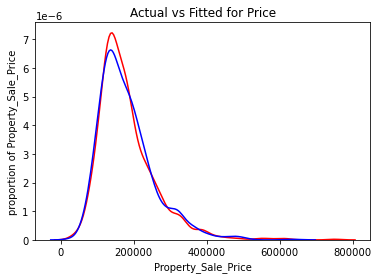

In [105]:
## distribution plot to compare actual VS predicted values for price
ax1=sns.distplot(df["Property_Sale_Price"],hist=False,color="r",label="Actual Values")
sns.distplot(yhat,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Property_Sale_Price")
plt.ylabel("proportion of Property_Sale_Price")
plt.show()

## Splitting thr data  in  training and test set
 

In [106]:
X=df_combined
y=df_numeric["Property_Sale_Price"]

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [108]:
X_train

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
654,655,20,91.000000,10437,8,6,1995,1995,660.0,1696,...,0,0,0,1,0,0,0,0,1,0
1043,1044,60,86.000000,11839,7,5,1990,1990,23.0,1085,...,0,0,0,1,0,0,0,0,1,0
288,289,20,72.056475,9819,5,5,1967,1967,58.0,450,...,0,0,0,1,0,0,0,0,1,0
2023,897,30,86.000000,8765,9,5,1936,1950,0.0,285,...,0,0,0,1,1,0,0,0,0,0
1429,1430,20,72.056475,12546,9,7,1981,1981,310.0,678,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,351,120,68.000000,7820,9,5,2007,2007,362.0,0,...,0,1,0,0,0,0,0,0,0,1
1930,976,160,72.056475,2651,4,8,1936,2000,0.0,641,...,0,0,0,1,0,0,0,0,1,0
79,80,50,60.000000,10440,5,6,1910,1981,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1859,905,20,72.056475,6173,5,6,1967,1967,24.0,599,...,0,0,0,1,0,0,0,0,1,0


#### linear Regreassion on train data

In [109]:
lm2=LinearRegression()

In [110]:
lm2.fit(X_train,y_train)

LinearRegression()

In [111]:
yhat2=lm.predict(X_train)

In [112]:
from sklearn.metrics import mean_squared_error,r2_score

In [113]:
print('R squared value for multiple Linear regression is:',r2_score(y_train,yhat2))

R squared value for multiple Linear regression is: 0.930071574498707


In [114]:
print('Mean square error for Multiple Linear regression is:',mean_squared_error(y_train,yhat2))
print('Root mean square error for multiple Linear regression is:',np.sqrt(mean_squared_error(y_train,yhat2)))

Mean square error for Multiple Linear regression is: 456084869.9925805
Root mean square error for multiple Linear regression is: 21356.143612379565


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


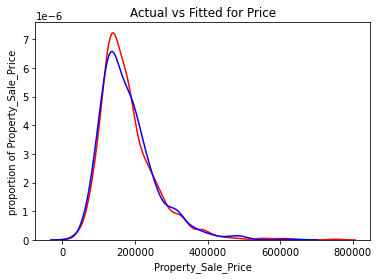

In [115]:
## distribution plot to compare actual VS predicted values for price
ax1=sns.distplot(df["Property_Sale_Price"],hist=False,color="r",label="Actual Values")
sns.distplot(yhat2,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Property_Sale_Price")
plt.ylabel("proportion of Property_Sale_Price")
plt.show()

#### Regressions for test data

In [116]:
y_pred=lm.predict(X_test)

In [117]:
y_pred

array([135744.54931065, 213624.57211242, 173652.54449674, 175145.43151682,
       103336.14105845, 109691.26398266, 219510.2567032 , 146927.51362953,
       110306.55481426, 280960.17414446, 233982.24924755, 241373.13981971,
        86333.90350082, 129818.79578368, 237062.98469499, 147070.65442767,
       114799.36549424, 162385.63395158, 141496.54144599, 132850.03334639,
       152334.37048941, 157848.82883783, 143370.07510482, 188444.46418689,
       166895.92582459,  96849.51390608, 117535.14774021, 167072.69887531,
       180249.4139145 , 316168.84023743, 187783.51522006, 150029.88674242,
       250059.97377941, 174716.15199895, 130551.43618575, 128103.20562109,
        95983.64275225, 158240.61306872, 210048.90794507, 141526.25247483,
       262156.68669317, 143758.15850915, 152231.42774893, 132608.35257231,
        96470.36202475, 143216.80574345, 113129.36902715, 157684.06024582,
        84977.83852612, 112049.87955924, 131569.05971734, 151889.79959693,
       342806.98622634, 2

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


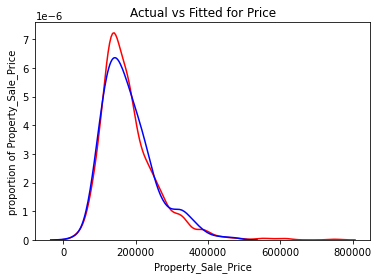

In [118]:
## distribution plot to compare actual VS predicted values for price
ax1=sns.distplot(df["Property_Sale_Price"],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Property_Sale_Price")
plt.ylabel("proportion of Property_Sale_Price")
plt.show()

### Checking for p_value Using STSTSMODELS

In [119]:
import statsmodels.api as sm
X_train_sm=X_train
## nulike  sklearn ststmodels dont  antomatically fit a constant, so you  need to use the method sm>add_constant(X) in order to add a constant
X_train_sm=sm.add_constant(X_train_sm)
##v create afitted model in onr line
lm_1=sm.OLS(y_train,X_train_sm).fit()

# print the coeff 
lm_1.params

const                   -64247.912076
Id                          -0.930486
Dwell_Type                  -0.748084
LotFrontage                 18.179234
LotArea                      0.376453
                             ...     
SaleCondition_AdjLand   -18140.863749
SaleCondition_Alloca     -7303.162799
SaleCondition_Family    -19239.980042
SaleCondition_Normal    -14275.848386
SaleCondition_Partial    15602.681496
Length: 291, dtype: float64

In [120]:
print(lm_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.937
Model:                             OLS   Adj. R-squared:                  0.925
Method:                  Least Squares   F-statistic:                     75.36
Date:                 Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                         11:59:21   Log-Likelihood:                -16448.
No. Observations:                 1451   AIC:                         3.338e+04
Df Residuals:                     1211   BIC:                         3.464e+04
Df Model:                          239                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [121]:
df[["LotArea","Property_Sale_Price"]].corr()

,LotArea,Property_Sale_Price
LotArea,1.000000,0.211572
Property_Sale_Price,0.211572,1.000000


<AxesSubplot:>

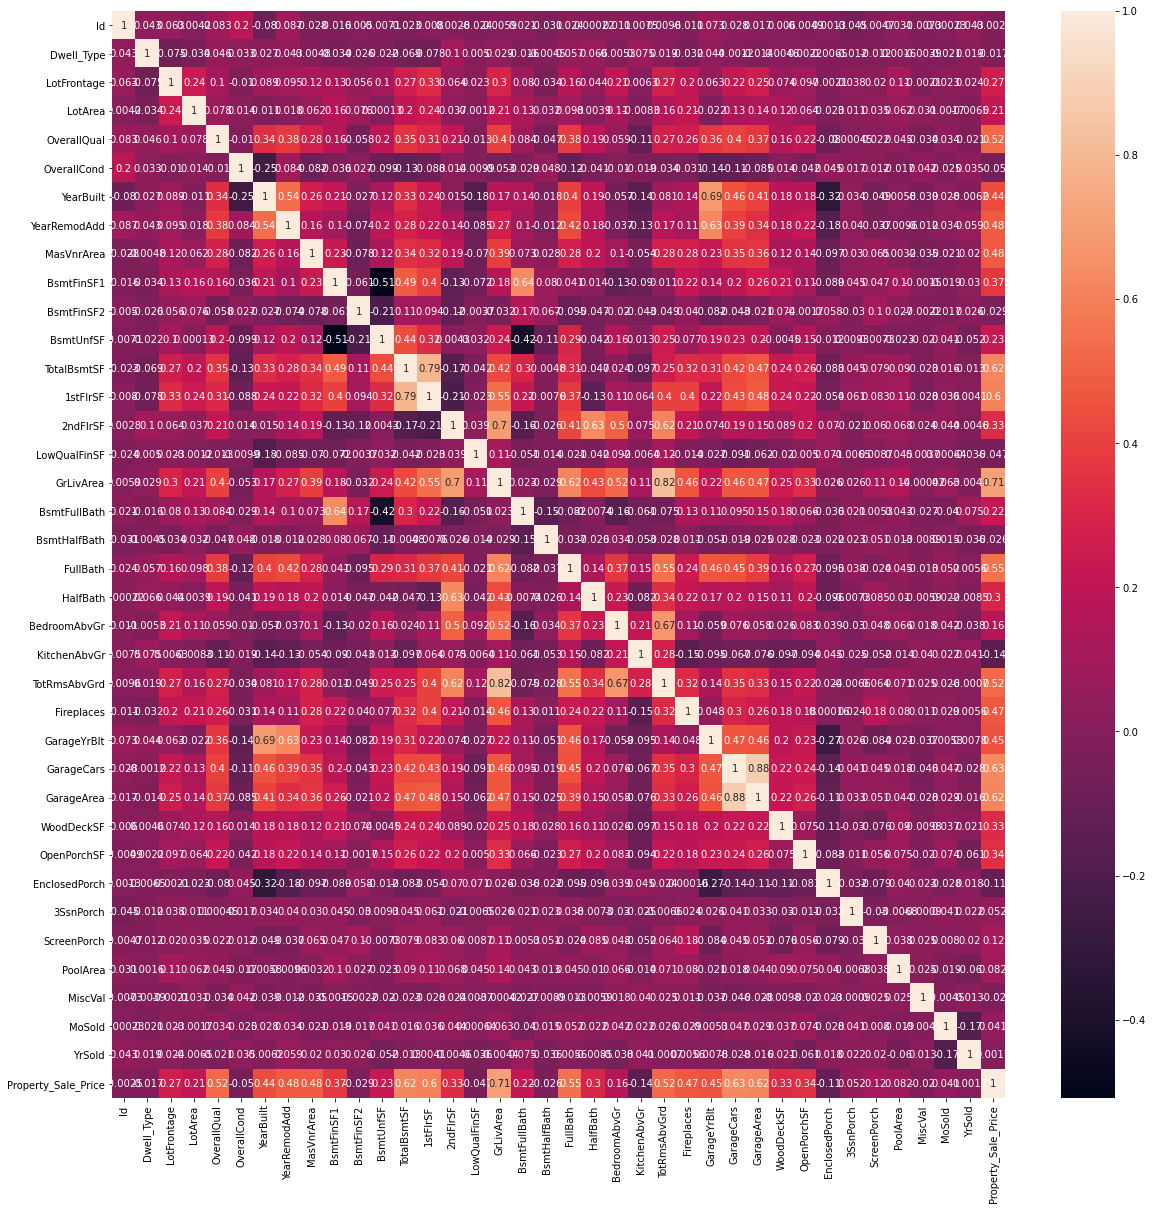

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(df_numeric.corr(),annot=True)

### Implementing the result

Text(0, 0.5, 'Property_Sale_Price')

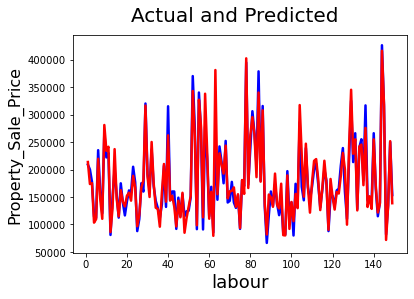

In [123]:
## Actual vr predicded 
## check for the forst 150 obsrv
c=[i for i in range (1,150,1)]
fig=plt.figure()
plt.plot(c,y_test[1:150],color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred[1:150],color="red",linewidth=2.5,linestyle="-")
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("labour",fontsize=18)
plt.ylabel("Property_Sale_Price",fontsize=16)


ValueError: x and y must have same first dimension, but have shapes (1450,) and (622,)

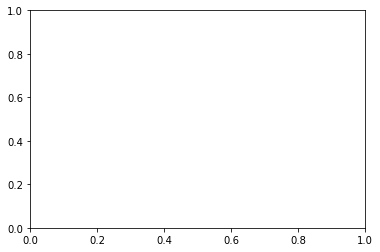

In [124]:
## error terms
c=[i for i in range(1,1451,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Actual predicted",fontsize=16)

In [125]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [126]:
from math import sqrt
rmse=sqrt(mse)

In [127]:
print("Mean_Squared_Error:",mse)
print("r_square_value:",r_squared)

Mean_Squared_Error: 374576328.5468651
r_square_value: 0.9306282924540018


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


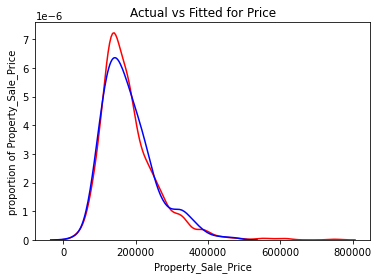

In [128]:
## distribution plot to compare actual VS predicted values for price
ax1=sns.distplot(df["Property_Sale_Price"],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Property_Sale_Price")
plt.ylabel("proportion of Property_Sale_Price")
plt.show()